Link [Colab notebook](https://colab.research.google.com/drive/1yHWWJU5la1ssSbkkB7QVLtS8_GAqbU1w?usp=sharing).
# Problem
## Binary classes
In this notebook, we consider the logistic regression problem, i.e linear function for classfication.
Given a dataset $\{x_i, y_i\}_{i=1}^N$, where each $x_i$ is a feature vector and $y_i \in \{0, 1\}$ a binary label. We want to find the best linear model that fit the given data in terms of the *binary cross entropy (BCE)* metric.

Unlike in the linear regression problem, our labels are now constrained in the two values of 0 and 1, we can think of this two value as the probabilities that a given datapoint belong to class 1, i.e. if the label is 1 then the probability of that data point to be in class 1 is 100% - a distribution of class conditioned on datapoints. With this interpretation, if we also constrain the output of our model to be also a distribution, then the use of BCE is apparent: it can be seen as the distance between two distributions, similar to the MSE loss (l2 distance) in the Euclidean space.

To transform the output of a linear model to a (binary) distribution, we apply a sigmoid function at the end of the model. It is often used to convert continuous values in $(-\infty, \infty)$ to probabilities,
\begin{align}
P_{\theta}(Y=1 | X=x) &= \frac{1}{1+e^{-\theta^T x}} \\
\Rightarrow \theta^T x &= \text{ln}\frac{P_{\theta}(Y=1 | X=x) }{P_{\theta}(Y=0 | X=x) }
\end{align}
that is, the output of the linear model is now the logarithm of the probability ratio of the two classes.





## MLE formulation
Minimizing the BCE loss with the classification problem is actully MLE under the hood. Denote the output of the model as $f_{\theta}(x) = (1+\exp(-\theta^T x))^{-1}$, then
\begin{align}
\text{arg}\max_{\theta}P(\{x_i, y_i\}_{i=1}^N | \theta) &= \text{arg}\max_{\theta} \prod_{i=1}^N f_\theta (x_i)^{y_i} (1-f_\theta (x_i))^{1-{y_i}} \\
&= \text{arg}\max_{\theta} \sum_{i=1}^N y_i\text{ln}f_\theta (x_i) + (1-{y_i})\text{ln} (1-f_\theta (x_i)) \\
&= \text{arg}\min_{\theta} \sum_{i=1}^N BCE(f_\theta (x_i), y_i)
\end{align}

## Gradient derivation
We denote (scalar) logit for the class 1 as $z=\theta ^T x$, then we have the gradient of the sigmoid, denoted as $\sigma(\cdot)$, and the logit $z$ as follow:
\begin{align}
\frac{d\sigma(z)}{dz} &= \Big( \frac{1}{1+e^{-z}} \Big)^{'} = \frac{e^{-z}}{(1+e^{-z})^2} \\
&= \sigma(z) (1-\sigma(z))
\end{align}
Note that we also have $f_{\theta}(x) = \sigma (\theta^T x)$,
we are now ready to calculate the gradient of the BCE objective w.r.t $\theta$
\begin{align}
\nabla_{\theta} \sum_{i=1}^N BCE(f_\theta (x_i), y_i) &= -\sum_{i=1}^N\nabla_\theta \big( y_i\text{ln}f_\theta (x_i) + (1-{y_i})\text{ln} (1-f_\theta (x_i) \big)\\
&= -\sum_{i=1}^N y_i \frac{\nabla_\theta f_\theta (x_i)}{f_\theta (x_i)} - (1-{y_i})\frac{\nabla_{\theta}f_\theta (x_i)}{1-f_\theta (x_i)} \\
&= -\sum_{i=1}^N \frac{y_i - f_\theta (x_i)}{f_\theta (x_i) (1-f_\theta (x_i))} \nabla_{\theta} f_\theta (x_i) \\
&=-\sum_{i=1}^N (y_i - f_\theta (x_i)) \nabla_{\theta} z \\
&=-\sum_{i=1}^N (y_i - f_\theta (x_i)) x_i \\
&=X^T ( f_\theta(X) - y)
\end{align}
From the above gradient, we can also see that there is no closed form of the optimal solution for the logistic regression problem, because such solution would require the $\theta$ to diverge to infinity (the sigmoid function tend to 0 and 1 at infinity). In the next section, we will use gradient descent to optimize the logistic regression models.

## Multiple classes
When the data has more than two classes, i.e. $\{1, \dots C\}$, with some number of classes $C$, then the above formulas is not applicable. In this section, we examine the logistic regression for multiple classes.

$X\in \mathbb R^{N \times d}$, $\theta \in \mathbb R^{d \times C}$, $y \in \mathbb R^{N \times C}$, $y_i$ are one hot vectors. The output are fed through a softmax layer.
$$f_\theta(x)_i = \frac{e^{\theta_i^T x}}{\sum_j^Ce^{\theta_j ^T x}}$$
By using similar arguments, we can show that the MLE of the above model class can be obtained by minimizing the cross entropy loss on the dataset. We will not repeat it here. The objective of the optimization
$$L(\theta, X, y) = -\sum_{i=1}^N \sum_j^C y_{ij}\text{ln} f_{\theta}(x_i)_j$$
Let $z_m = \theta_m ^T x$ and $Z = \sum_i e^{z_i}$, then
\begin{align}
\frac{\partial \text{ln}f_\theta(x)_j}{\partial z_m} = \frac{Z}{e^{z_j}} \Big[
    \frac{\mathbf 1(m=j)Ze^{z_j} - e^{z_j + z_m}}{Z^2}
     \Big] = \mathbf 1(m=j) - f_{\theta}(x)_m
\end{align}
substitute the above into the gradient of cross entropy
\begin{align}
\nabla_{\theta_m} L(\theta, X, y) &= -\sum_{i=1}^N \sum_j^C y_{ij}
[\mathbf 1(m=j) - f_{\theta}(x_i)_m]x_i\\
\Rightarrow \nabla_{\theta} L(\theta, X, y) &= -\sum_{i=1}^N x_i y_i^T (I - \mathbf 1_C f_{\theta}(x_i)^T) \\
&= -\sum_{i=1}^N x_i (y_i^T - f_{\theta}(x_i)^T)\\
&= X^T (f_{\theta}(X) - y)
\end{align}
The gradient looks exactly the same as in the binary class cases.

# Using logistic regression


In [ ]:
#@title import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Binary classes

In [ ]:
#@title helper functions
def eval(X, y, theta):
    sigmoid = 1 / (1 + np.exp(-X @ theta) )
    bce = -np.mean(
        y * np.log(sigmoid + 1e-6) + (1-y) * np.log(1 - sigmoid + 1e-6)
    )
    return bce

In [ ]:
#@title Binary classification
X, y = load_breast_cancer(return_X_y=True)
# split the train and test dataset
X_train, X_test,\
    y_train, y_test = train_test_split(X, y,
                                       test_size=0.20,
                                       random_state=23)


X_train_pad = np.concatenate([np.ones((X_train.shape[0], 1)), X_train], axis=-1) # add bias
X_test_pad = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=-1)

print(X_train.shape, X_train_pad.shape, y_train.shape)


(455, 30) (455, 31) (455,)


In [ ]:
X_train.max()

3432.0

final loss: 0.6869940371952209


<ipython-input-159-3d058d802544>:3: RuntimeWarning: overflow encountered in exp
  sigmoid = 1 / (1 + np.exp(-X @ theta) )
<ipython-input-162-047b408f5996>:16: RuntimeWarning: overflow encountered in exp
  sigmoid = 1 / (1 + np.exp(-X_train_pad @ current_theta) )


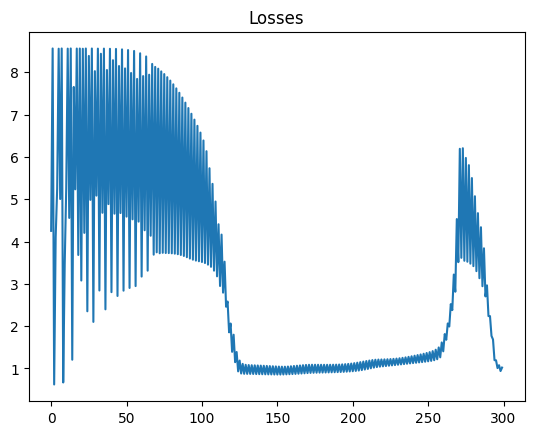

test Accuracy: 0.9122807017543859
train Accuracy: 0.9076923076923077


In [ ]:
#@title Full Gradient descent {vertical-output: true}

assert y_train.max() <= 1

lr = 5e-7
epoch = 300

losses = []

# init theta
current_theta = np.random.randn((X_train_pad.shape[-1]))/10

for _ in range(epoch):
    losses.append(eval(X_train_pad, y_train, current_theta))

    sigmoid = 1 / (1 + np.exp(-X_train_pad @ current_theta) )
    grad = X_train_pad.T @ (sigmoid - y_train)
    current_theta -= grad * lr

print("final loss:", eval(X_test_pad, y_test, current_theta))
plt.plot(losses)
plt.title("Losses")
plt.show()

sigmoid_test = 1 / (1 + np.exp(-X_test_pad @ current_theta) )
y_pred = np.round(sigmoid_test)
accuracy = np.mean(y_pred == y_test)
print("test Accuracy:", accuracy)

sigmoid_train = 1 / (1 + np.exp(-X_train_pad @ current_theta) )
y_pred = np.round(sigmoid_train)
accuracy = np.mean(y_pred == y_train)
print("train Accuracy:", accuracy)

final loss: 0.4689338496917546


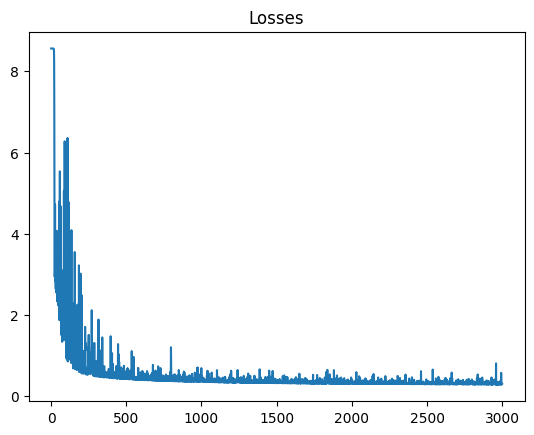

test Accuracy: 0.8333333333333334
train Accuracy: 0.8065934065934066


In [ ]:
#@title minibatch Gradient descent {vertical-output: true}

assert y_train.max() <= 1
batch_size = 32
lr = 5e-7
epoch = 3000

losses = []

# init theta
current_theta = np.random.randn((X_train_pad.shape[-1]))/10

for _ in range(epoch):
    losses.append(eval(X_train_pad, y_train, current_theta))

    indx = np.random.choice(X_train_pad.shape[0], batch_size)
    X_batch = X_train_pad[indx]
    y_batch = y_train[indx]

    sigmoid = 1 / (1 + np.exp(-X_batch @ current_theta) )
    grad = -X_batch.T @ (y_batch - sigmoid)
    current_theta -= grad * lr

print("final loss:", eval(X_test_pad, y_test, current_theta))
plt.plot(losses)
plt.title("Losses")
plt.show()

sigmoid_test = 1 / (1 + np.exp(-X_test_pad @ current_theta) )
y_pred = np.round(sigmoid_test)
accuracy = np.mean(y_pred == y_test)
print("test Accuracy:", accuracy)

sigmoid_train = 1 / (1 + np.exp(-X_train_pad @ current_theta) )
y_pred = np.round(sigmoid_train)
accuracy = np.mean(y_pred == y_train)
print("train Accuracy:", accuracy)

In [ ]:
# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
# Prediction
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy os Sklearn (in %):", acc*100)

Logistic Regression model accuracy os Sklearn (in %): 95.6140350877193


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 **Remark:** The training of the gradient descent in our example is very unstable, because the pure gradient descent is noisy. In practice, we usually employ several tricks to make the Gradient descent more robust, for example using momentum, normalizing the data, cliping gradient, using other more sophisticated optimizer such as Adam. In the next section, we will normalize the input data dimension-wise before training with gradient descent

final loss: 0.05371030169052958


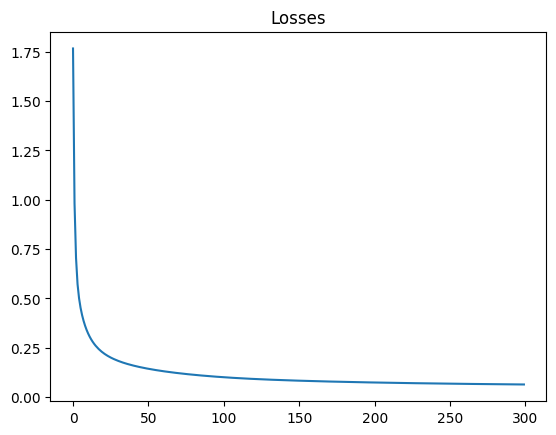

test Accuracy: 0.9824561403508771
train Accuracy: 0.9868131868131869


In [ ]:
#@title Full Gradient descent (normalized input) {vertical-output: true}

assert y_train.max() <= 1

X_mean = np.mean(X_train_pad, axis=0, keepdims=True)
X_std = np.std(X_train_pad, axis=0, keepdims=True)

X_train_pad = (X_train_pad - X_mean) / (X_std+1e-8)
X_test_pad = (X_test_pad - X_mean) / (X_std+1e-8)

lr = 1e-3
epoch = 300

losses = []

# init theta
current_theta = np.random.randn((X_train_pad.shape[-1]))

for _ in range(epoch):
    losses.append(eval(X_train_pad, y_train, current_theta))

    sigmoid = 1 / (1 + np.exp(-X_train_pad @ current_theta) )
    grad = -X_train_pad.T @ (y_train - sigmoid)
    current_theta -= grad * lr

print("final loss:", eval(X_test_pad, y_test, current_theta))
plt.plot(losses)
plt.title("Losses")
plt.show()

sigmoid_test = 1 / (1 + np.exp(-X_test_pad @ current_theta) )
y_pred = np.round(sigmoid_test)
accuracy = np.mean(y_pred == y_test)
print("test Accuracy:", accuracy)

sigmoid_train = 1 / (1 + np.exp(-X_train_pad @ current_theta) )
y_pred = np.round(sigmoid_train)
accuracy = np.mean(y_pred == y_train)
print("train Accuracy:", accuracy)

final loss: 0.05484651062172248


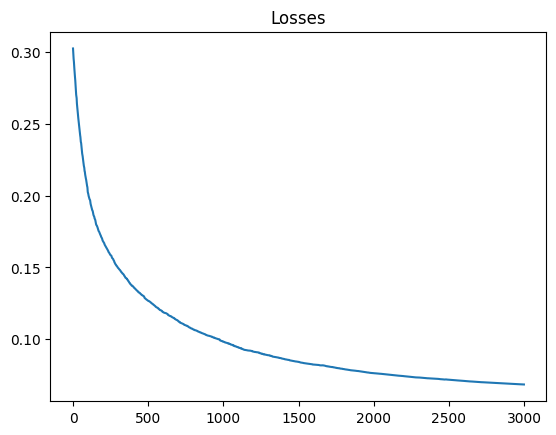

test Accuracy: 0.9824561403508771
train Accuracy: 0.978021978021978


In [ ]:
#@title minibatch Gradient descent (normalized input) {vertical-output: true}

assert y_train.max() <= 1
batch_size = 32
lr = 1e-3
epoch = 3000

losses = []

# init theta
current_theta = np.random.randn((X_train_pad.shape[-1]))

for _ in range(epoch):
    losses.append(eval(X_train_pad, y_train, current_theta))

    indx = np.random.choice(X_train_pad.shape[0], batch_size)
    X_batch = X_train_pad[indx]
    y_batch = y_train[indx]

    sigmoid = 1 / (1 + np.exp(-X_batch @ current_theta) )
    grad = -X_batch.T @ (y_batch - sigmoid)
    current_theta -= grad * lr

print("final loss:", eval(X_test_pad, y_test, current_theta))
plt.plot(losses)
plt.title("Losses")
plt.show()

sigmoid_test = 1 / (1 + np.exp(-X_test_pad @ current_theta) )
y_pred = np.round(sigmoid_test)
accuracy = np.mean(y_pred == y_test)
print("test Accuracy:", accuracy)

sigmoid_train = 1 / (1 + np.exp(-X_train_pad @ current_theta) )
y_pred = np.round(sigmoid_train)
accuracy = np.mean(y_pred == y_train)
print("train Accuracy:", accuracy)

It is much better by just simply normalizing the input data to an appropriate range.

## Multiple classes

In [ ]:
#@title helper functions
def eval(X, y, theta):
    z = np.exp(X @ theta )
    softmax = z / np.sum(z, axis=-1, keepdims=True)
    ce = -np.mean(
        y * np.log(softmax)
    )
    return ce

def accuracy(X, y, theta):
    logits = X @ theta
    pred = np.argmax(logits, axis=-1)
    pred = pred.reshape(y.shape)
    return np.mean(pred == y)

def softmax(X, theta):
    z = np.exp(X @ theta)
    return z / np.sum(z, axis=-1, keepdims=True)


In [ ]:
X, y = load_iris(return_X_y=True)
# split the train and test dataset
n_classes = np.max(y)+1

X_train, X_test,\
    y_train, y_test = train_test_split(X, y,
                                       test_size=0.20,
                                       random_state=23)

X_train.shape, y_train.shape, n_classes

((120, 4), (120,), 3)

In [ ]:
y_train_onehot = np.zeros((y_train.shape[0], n_classes), dtype=int)
y_train_onehot[np.arange(y_train.shape[0]), y_train] = 1

X_train_pad = np.concatenate([np.ones((X_train.shape[0], 1)), X_train], axis=-1) # add bias
X_test_pad = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=-1)

y_train_onehot.shape

(120, 3)

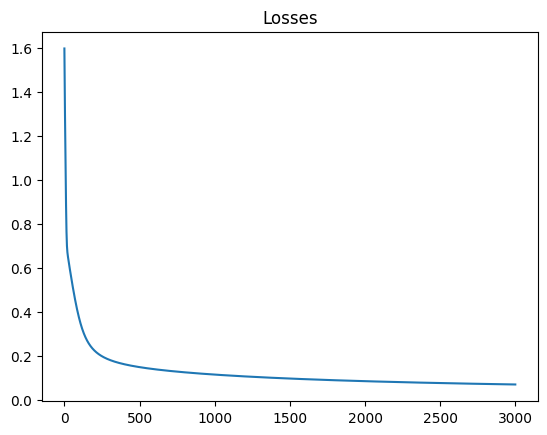

test Accuracy: 0.9666666666666667
train Accuracy: 0.975


In [ ]:
#@title Full Gradient descent {vertical-output: true}


lr = 1e-4
epoch = 3000

losses = []

# init theta
current_theta = np.random.randn(X_train_pad.shape[-1], n_classes)

for _ in range(epoch):
    losses.append(eval(X_train_pad, y_train_onehot, current_theta))

    sm = softmax(X_train_pad, current_theta)
    grad = X_train_pad.T @ (sm - y_train_onehot)
    current_theta -= grad * lr

plt.plot(losses)
plt.title("Losses")
plt.show()

acc = accuracy(X_test_pad, y_test, current_theta)
print("test Accuracy:", acc)

acc = accuracy(X_train_pad, y_train, current_theta)
print("train Accuracy:", acc)

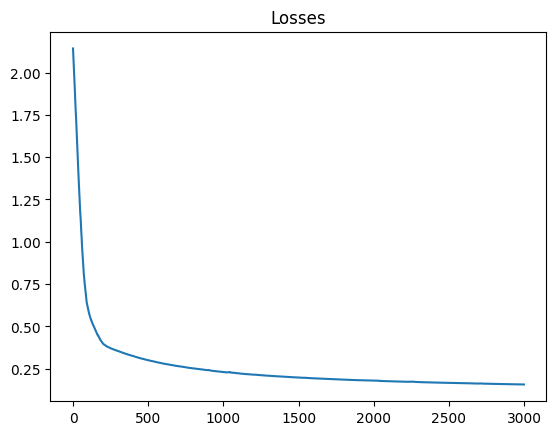

test Accuracy: 1.0
train Accuracy: 0.9166666666666666


In [ ]:
#@title minibatch Gradient descent {vertical-output: true}

batch_size = 16
lr = 1e-4
epoch = 3000

losses = []

# init theta
current_theta = np.random.randn(X_train_pad.shape[-1], n_classes)

for _ in range(epoch):
    losses.append(eval(X_train_pad, y_train_onehot, current_theta))

    indx = np.random.choice(X_train_pad.shape[0], batch_size)
    X_batch = X_train_pad[indx]
    y_batch = y_train_onehot[indx]

    sm = softmax(X_batch, current_theta)
    grad = X_batch.T @ (sm - y_batch)
    current_theta -= grad * lr

plt.plot(losses)
plt.title("Losses")
plt.show()

acc = accuracy(X_test_pad, y_test, current_theta)
print("test Accuracy:", acc)

acc = accuracy(X_train_pad, y_train, current_theta)
print("train Accuracy:", acc)

In [ ]:
# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
# Prediction
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy os Sklearn (in %):", acc*100)

Logistic Regression model accuracy os Sklearn (in %): 100.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Since the data distribution of the iris dataset is not very skewed, gradient descent can achieve stable performance even without normalizing input data. Though applying the normalization would still increase the convergence rate.